
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction and questions asking</a></li>
<li><a href="#wrangling">Data Wrangling (General properties and cleaning)</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction and questions asking

### Dataset Description 

This dataset shows data of attendance of a record of 1105267 appointments and 14 variables about them, namely (pretty self explanatory):

PatientId         
AppointmentID     
Gender            
ScheduledDay      
AppointmentDay    
Age               
Neighbourhood     
Scholarship: this means if they are enrolled to Brazilian welfare program called Bolsa Familia where the government provides monthly cash if the families made sure their kids get vaccinated and don't miss schooldays more than a set number.
Hipertension      
Diabetes          
Alcoholism        
Handcap           
SMS_received      
No-show          

### Question(s) for Analysis

We are trying to understand why some patients would schedule an appointment an then not show up? what factors may correlate with not attending?


In [1]:
#Importing needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install pandas

<a id='wrangling'></a>
## Data Wrangling (General properties and cleaning)


### General Properties

In [3]:
# Load data 
df = pd.read_csv('no_show.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


__Issue 1__:I might think to drop columns I don't think would be helpful later to make things faster like patientid and appointmentid 
<br> __Issue 2__ if the scheduled and appointment are identical I will drop one of them
<br> no missing values present
<br> __Issue 3__:rename No-show column to no_show, Hipertension to Hypertension and Handcap to Handicap 

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


*This shows that the average age of patients is 37 y.o. with the youngest being months y.o. and the oldest 115 y.o., but as age can't be described in negative values I will remove this row later. __Issue 4__
<br> *at least 75% are not enrolled in the Bolsa Familia.
<br> *the same for chronic diseases (hypertension, diabetes and alcoholism),only 25% has one or more of them.
<br> *Only 25% of patients has one or more handicap.
<br> *up to 50% of them didn't recieve an SMS.

In [7]:
df.duplicated().value_counts() #checking for identical duplicates

False    110527
dtype: int64

ok so no duplicates
<br> __Issue 5__: might apply a mask to select those who showed (shw) and those who didn't show (nnshw) to facilitate comparisons


### Data Cleaning


__Issue 1__

In [8]:
df.drop(labels=['PatientId', 'AppointmentID'], axis=1,inplace= True) #drop uneeded columns 

In [9]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


__Issue 2__

In [10]:
df['ScheduledDay'].equals(df['AppointmentDay']) #check if both columns are identical

False

In [11]:
df.drop(labels=['ScheduledDay'], axis=1,inplace= True) #drop uneeded columns

In [12]:
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']) #convert column to datetime

__Issue 3__

In [14]:
df= df.rename({'No-show': 'no_show'}, axis=1) #renaming columns

In [15]:
df= df.rename({'Hipertension': 'Hypertension'}, axis=1)

In [16]:
df= df.rename({'Handcap': 'Handicap'}, axis=1)

In [17]:
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,no_show
0,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


__Issue 4__

In [18]:
df.drop(df[(df['Age'] == -1)].index, inplace=True)

__Issue 5__

In [19]:
shw=df.loc[df['no_show'] == 'No'] #selecting rows of the ones that attended

In [20]:
shw.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000
mean,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337
std,23.338645,0.291697,0.403261,0.261508,0.171733,0.162751,0.454381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [21]:
nnshw=df.loc[df['no_show'] == 'Yes'] #selecting the rows of the ones that didn't attend

<a id='eda'></a>
## Exploratory Data Analysis

### Some general trend exploration:

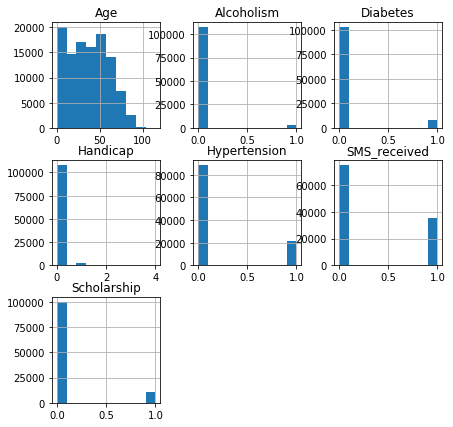

In [22]:
df.hist(figsize=(7,7)); #to spot any useful trend to guide the analysis

In [23]:
df['no_show'].describe()

count     110526
unique         2
top           No
freq       88207
Name: no_show, dtype: object

This means most of the patients did come to the appointment and only 20% didn't show up

In [24]:
shw.describe() #trying to see characteristics in those who showed


,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000
mean,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337
std,23.338645,0.291697,0.403261,0.261508,0.171733,0.162751,0.454381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [25]:
nnshw.describe() ##trying to see characteristics in those who showed

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371
std,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Both groups (showed and non showed) have a similar mean age of 37 and 34 respectively.
<br> all these variables don't seem to differ in a significant manner at a first glance between both groups (Age, scholarship, hypertension, diabetes,alcoholism, handicap).Recieving an SMS will be further explored.
<br> still to look at Gender and Neighbourhood

### Research Question 1: ''Does gender correlate with showing up?''


In [26]:
df['Gender'].describe()

count     110526
unique         2
top            F
freq       71839
Name: Gender, dtype: object

Females comprise 65% and Males 35% of all patients

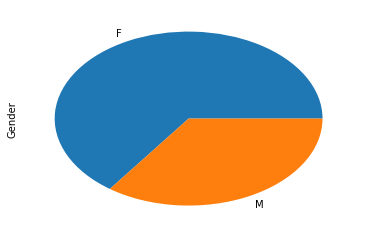

In [27]:
df['Gender'].value_counts().plot(kind= 'pie');

In [28]:
df.groupby('no_show')['Gender'].describe()

,count,unique,top,freq
no_show,,,,
No,88207,2,F,57245
Yes,22319,2,F,14594


most of no show instances where by females (~65%),and also they were the more to show up (65%), this shows that gender doesn't affect the attending,but it could be due to them being the most in the sample anyway.

### Research Question 2: ''Does recieving an SMS correlate with showing up?''

In [29]:
shw.groupby('no_show')['SMS_received'].describe()

,count,mean,std,min,25%,50%,75%,max
no_show,,,,,,,,
No,88207.0,0.291337,0.454381,0.0,0.0,0.0,1.0,1.0


In [30]:
nnshw.groupby('no_show')['SMS_received'].describe()

,count,mean,std,min,25%,50%,75%,max
no_show,,,,,,,,
Yes,22319.0,0.438371,0.496198,0.0,0.0,0.0,1.0,1.0


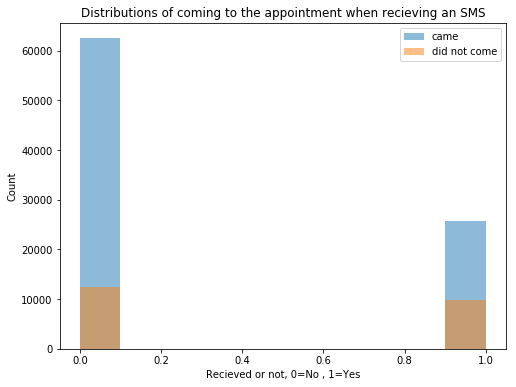

In [37]:
fig, ax = plt.subplots(figsize =(8,6))
ax.hist(shw['SMS_received'], alpha=0.5, label='came')
ax.hist(nnshw['SMS_received'], alpha=0.5, label='did not come')
ax.set_title('Distributions of coming to the appointment when recieving an SMS')
ax.set_xlabel('Recieved or not, 0=No , 1=Yes')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show();

Here we see that 80% of the patients coming to the appointment didn't recieve an SMS

### Research Question 2: ''Does Neighbourhood correlate with showing up?''

In [65]:
fory=shw['Neighbourhood'].value_counts()
print(fory)

JARDIM CAMBURI         6252
MARIA ORTIZ            4586
RESISTÊNCIA            3525
JARDIM DA PENHA        3246
SANTA MARTHA           2635
CENTRO                 2631
ITARARÉ                2591
TABUAZEIRO             2559
SANTO ANTÔNIO          2262
BONFIM                 2223
JESUS DE NAZARETH      2157
SANTO ANDRÉ            2063
JABOUR                 2058
CARATOÍRA              1974
SÃO PEDRO              1933
NOVA PALESTINA         1862
DA PENHA               1788
ANDORINHAS             1741
ROMÃO                  1740
ILHA DO PRÍNCIPE       1734
GURIGICA               1562
SÃO JOSÉ               1549
FORTE SÃO JOÃO         1543
ILHA DE SANTA MARIA    1524
BELA VISTA             1523
MARUÍPE                1478
SÃO CRISTÓVÃO          1473
REDENÇÃO               1278
JOANA D´ARC            1169
SÃO BENEDITO           1152
                       ... 
DO CABRAL               472
SANTOS REIS             435
ESTRELINHA              432
SOLON BORGES            400
SANTA CLARA         

There are 80 locations of the patients residence (not the clinics location as seen in the data source) and JARDIM CAMBURI MARIA ORTIZ being havong the most number of attendance, would this be due to the location characteristics like maybe it is more accessible to the clinic or its inhabitants more motivated to go or maybe it is just the same for the non show group for each neighbourhhod according to its proportion to the sample?

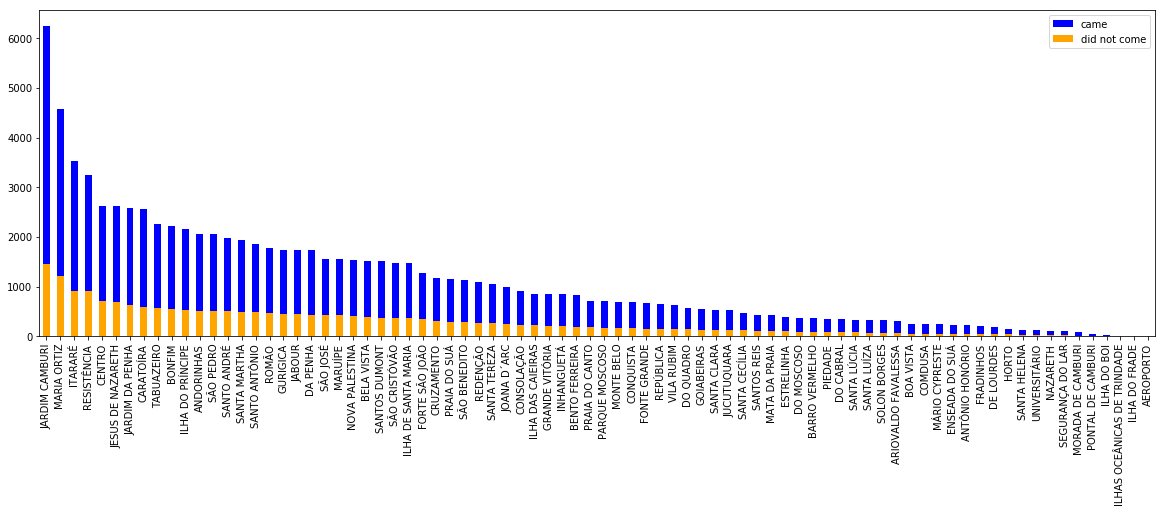

In [66]:
shw ['Neighbourhood'].value_counts().plot(kind='bar',stacked=True,figsize=(20, 6), alpha=1, color= 'blue', label='came')
nnshw['Neighbourhood'].value_counts().plot(kind='bar',stacked=True,figsize=(20,6), alpha=1, color= 'orange', label='did not come')
plt.legend();


There seems to be a positive correlation between attending and not attending the appointment for all the locations, suggesting that the location itself is not a factor.

<a id='conclusions'></a>
## Conclusions


>--We tried to see trends and correlations in the data to understand what factors affect the showing of patients to the appointment.
>--We at a first look there wasn't a clear similar distribution in each factor to that of the No-show variable
>--Further examining the categorical data namely Gender, Neighbourhood and recieving an SMS still no strong correlation found,but rather the data kept the percentage of showing and not showing roughly the same in each forementioned variable.

>--Some limitations in the dataset included having ages of negative values.
>--The analysis would benefit from running some statistical tests.



In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0